<a href="https://colab.research.google.com/github/tomaclaudia/Analyzing-US-Economic-Data-and-Building-a-Dashboard/blob/master/Metaheuristics_lab2_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metaheuristic Algorithms - Lab 2

## Objectives
 
* Implementation of some trajectory based local and global search:  Simulated Annealing, Tabu Search, Nelder Mead and Pattern Search
* Applications in combinatorial optimization (TSP and knapsack problem) and continuous optimization (traditional benchmark functions)

## Combinatorial optimization problems

The search space of combinatorial optimization problems is usually finite but of large size. Thus an exhaustive search space exploration is inapplicable. 

Two well-known combinatorial optimization problems, which have several practical applications are: 
* Travelling salesman problem (TSP)
* Knapsack problem


### Travelling Salesman Problem

TSP is a well known combinatorial optimization problem asking to find the optimal route for a salesman who has to visit a set of n towns. It is a constrained optimization problem characterized by:
* Constraints: the salesman visits each town exactly once
* Objective function: the cost of the tour should be minimized

The classical TSP is equivalent with the problem of finding an optimal Hamiltonian tour (a tour which visits exactly once each node and has the smallest cost) in a complete graph (there is an edge between any two nodes). TSP can be solved exactly for small values of n but, since the number of possible tours is $(n-1)!/2$, for large values of n there are no efficient exact methods. TSP belongs to the class of NP-complete problems.

There are several variants of the problem: 
* Asymmetric TSP: the cost of the connection between two nodes depends on the tour orientation. 
* Sequential Ordering Problem – SOP:  there are additional constraints specifying that a given node should be visited before another one. 
* Capacitated vehicle routing problem – CVRP: find optimal tours for a set of trucks which have to transport products from a warehouse to different customers. The trucks have a limited capacity (e.g. all trucks the same capacity).
* Generalized TSP: the nodes correspond to clusters of locations and there are several arcs between nodes.
TSP is important not only from a theoretical point of view but also from a practical point of view since there are several real-world problems which can be formulated as a TSP:
* Vehicle Routing Problem (VRP): find the optimal route for vehicles 
* Control of drilling machines which are used to construct boards for integrated circuits
* Find shortest routes through selections of airports in the world
* Reconstruct DNA sequences starting from subsequences (genome assembling)

Other applications are listed at [http://www.tsp.gatech.edu/apps/index.html]

Besides exact methods, there exist a lot of heuristic methods based on incremental improvements of the current tour. One of the most used heuristics for TSP is the Lin-Kernighan heuristic which is based on replacing some arcs of the current tour with other ones such that the total cost becomes smaller. The simplest case is when just two arcs are replaced (2-opt transformation) which is equivalent with reversing the order of visiting the nodes belonging to a subtour.

Example:  Let us consider 6 nodes: $A,B,C,D,E,F$. If the current tour is $(A,C,B,E,F,D)$, by replacing the edge $(A,C)$ with the edge  $(A,F)$, and the edge  $(F,D)$ with $(C,D)$ and by reversing the order of visiting the nodes $B$ and $E$ one obtains the tour $(A,F,E,B,C,D)$. It is easy to see that this transformation can be obtained directly by reversing the subtour $(C,B,E,F)$.

Another perturbation heuristic for TSP is that based on 4 interchanges (double bridge transform) which transforms a route $[i1..i2]$ $[i3..i4]$ $[i5..i6]$ $[i7..i8]$ into  $[i2..i1]$ $[i4..i3]$ $[i6..i5]$ $[i8..i7]$.


### Knapsack Problem

The classical variant of the knapsack problem is:  “Let us consider a set of n objects, each one being characterized by a given weight and a given value. Select a subset of objects such that the total size of the selected objects is smaller than a knapsack capacity and the total value of the selected objects is as large as possible.” 

The search space is represented by all possible subsets of the set of n objects, thus the search space size is $2^n$.

Real world problems which can be formulated as the knapsack problem are:

* Financial portfolios construction (the aim being the maximization of the profit such that the amount of investment is lower than a given threshold).
* Resource allocation (the selection of some tasks which can use a given resource such that the resource is not overloaded and some gain is maximized).
* The selection of some products to be placed in a container or warehouse. 


Variants of the problem:
* Multi-criterial case:  the aim is not only to maximize a value but optimize several criteria 
* Multi-dimensional case:  the “size”/”weight” of an object is not specified by a single value but by multiple values 
* Multiple knapsacks:  several knapsacks are used (this is related to the bin packing problem)  


## Simulated Annealing


###  General description

Simulated Annealing is a metaheuristic characterized by the fact that lower quality configurations may be accepted. The decision on the acceptance of such configurations is taken probabilistically, and the acceptance probability depends on a parameter called “temperature” (by analogy with the temperature of physical systems which are involved in a thermal process, e.g. annealing of alloys).  The probability of accepting a lower quality configuration is higher if the temperature is higher.


General structure of Simulated Annealing:

> S=initial configuration
>
> T=initial value of the temperature
>
> Repeat
>>
>>    S’=perturb(S)
>>
>>    If accept(S,S’,T) then S=S’
>>
>>    T=update(T)
>>
> Until "stopping condition"

The perturbation depends on the problem to be solved and the probability to accept the transition form a configuration $S$ to a configuration $S’$ depends on the loss of quality (if the loss is small the acceptance probability is higher).  An example of the implementation of an acceptance rule is (in the case of a minimization problem): 

>Accept(S,S’,T)
>>If rand(0,1)<exp(-(f(s’)-f(s))/T) then 
>>
>>>   Return True
>>
>>Else 
>>
>>>   Return False




### Solving TSP by using  “Simulated Annealing”

In order to solve a problem by using Simulated Annealing there are several elements to be established: 

1. Solution encoding.  The natural encoding variant for TSP is the permutation: a tour through n nodes can be described as a permutation of order n. This encoding ensures the satisfaction of the constraint of visiting only once each node. 

Example: If the towns are numbered as follows: $1-A$, $2-B$, $3-C$, $4-D$, $5-E$, $6-F$ then the route $(A,C,B,E,F,D)$ corresponds to the permutation $(1,3,2,5,6,4)$

2. Local search mechanism (construction of a new configuration starting from the existing one by perturbation) The simplest mechanism is based on a  2-opt transformation:
 * Choose two random indices $i$ and $j$ such that $1\leq i<j\leq n$
 * Reverse the order of elements in the permutation having indices between $i$ and $j$. 

Example:  If the current tour is described by the permutation $(1,3,2,5,6,4)$ and $i=2$, $j=5$ then the new permutation will be: $(1,6,5,2,3,4)$

3. Acceptance probability. The probability to accept a configuration S’ obtained from the configuration S can be computed by using the Boltzmann distribution:

$P(S’|S)=min\{1,\exp(-(cost(S’)-cost(S))/T(k)\}$

where $cost(S)$ is the cost of configuration $S$ and $T(k)$ is a control parameter (temperature). 


4. Cooling schedule.  If $T(k)$ denotes the temperature corresponding to the iteration $k$ then the value corresponding to the next iteration can be computed as follows:

 * 	$T(k+1)=T(0)/log(k+c)$, $c$ being a constant
 *  $T(k+1)=T(0)/k$
 *  $T(k+1)=a T(k)$,  with $a$ denoting a value smaller but close to $1$ (e.g. $a=0.99$)

**Remark.**  The initial value of the temperature ($T(0)$) should be large enough to allow the 
transition between any two configurations. 

* Stopping condition. The stopping criterion can be related to the value of the temperature (stop when the temperature is low enough), to the number of iterations (stop after a given number of iterations) or to the value of the objective function (cost of the tour). 

**Application 1.** Implement the Simulated Annealing for TSP. Use test instances from http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/


**Exercises**:
1.  Analyze the behavior of the algorithm for the problems: eil51.tsp, eil76.tsp, eil101.tsp
1.	Test the algorithm for each of the cooling schedules mentioned above 
1.	Modify the function which compute the cost of a tour such that the distance between two nodes is computed only once (hint: store the distances in a matrix)


# New section

In [4]:
%matplotlib inline
import random, numpy, math, copy, matplotlib.pyplot as plt
import numpy as np
class City:
    """class for the coordinates of a location """
    def __init__(self, coords):
        self.x = int(coords[0])   
        self.y = int(coords[1])
    
    def distance(self, city):
        """
        Euclidean distance between two locations
        """
        xDis = self.x - city.x
        yDis = self.y - city.y
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"
    
    #def getCoord(self):
    #    return [self.x, self.y]

class TSP:
    def __init__(self, filename = None, cities_no = 10):
        """
         random generation of location coordinates / reading data from a .tsp file 
        """
        if filename is None:
            self.N = cities_no
            self.cities = [City(random.sample(range(100), 2)) for i in range(self.N)];
        else:
            self.N, self.cities = self.___read_TSP_file(filename)
        
    def ___read_TSP_file(self, filename):
        nodelist = []

        # Open input file
        with open(filename, 'r') as infile:

            # Read instance header
            Name = infile.readline().strip().split()[1] # NAME
            FileType = infile.readline().strip().split()[1] # TYPE
            Comment = infile.readline().strip().split()[1] # COMMENT
            Dimension = infile.readline().strip().split(":")[1] # DIMENSION
            EdgeWeightType = infile.readline().strip().split()[1] # EDGE_WEIGHT_TYPE
            infile.readline()

            # Read node list
            N = int(Dimension)
            for i in range(N):
                coords = infile.readline().strip().split()[1:]
                nodelist.append(City(coords))

        return N, nodelist
    
    def eval(self, tour):
        """computation of a tour cost"""
        val = 0
        for i in range(self.N-1):
            val += self.cities[tour[i]].distance(self.cities[tour[i+1]])
        val += self.cities[tour[0]].distance(self.cities[tour[self.N-1]])
        return val
    
    def displayTour(self, tour):
        """plot the tour"""
        
        plt.figure(figsize = (16,8))

        plt.axes()
        plt.plot([self.cities[tour[i % self.N]].x for i in range(self.N+1)], [self.cities[tour[i % self.N]].y for i in range(self.N+1)], 'bo-');
        plt.show()
    
    def init_solution(self):
        """initial solution - random perturbation"""
        return random.sample(range(self.N), self.N);

    def perturb_solution(self, S):
        """2-opt perturbation"""
        i, j = random.sample(range(self.N),2)
        if i > j: i,j=j,i
        new_S = S.copy()
        for k in range((j-i)//2):
            new_S[i+k],new_S[j-k]=new_S[j-k],new_S[i+k]
        return new_S
    
prob = TSP("eil51.tsp")
#prob = TSP("eil101.tsp")
#prob = TSP()
tour = random.sample(range(prob.N),prob.N); # random initial tour
prob.displayTour(tour)
print(prob.eval(tour))




FileNotFoundError: ignored

3439.756126410295 1000.0
3416.0912740633476 999.5
3379.0734583601097 999.00025
3376.8225038925657 998.5007498750001
3368.051778646947 998.0014995000627
3345.324255661127 913.4536598864075
3333.251446652796 912.9969330564644
3308.1516464484175 911.1723082293099
3291.316607243506 853.3891362999201
3248.7680761485153 852.9624417317701
3236.9316701108683 809.3264725136627
3212.816609031611 808.1130896985809
3194.927755383777 801.6723718975803
3194.5281023748644 733.0234022860984
3154.912112974707 732.6568905849554
3148.2479346686105 732.2905621396629
3105.860388950396 731.9244168585932
3082.7840719809446 730.4616655455851
3076.395776098233 620.5684974077684
3013.6461468783423 617.4726270159383
2995.8135733321146 616.8553087570792
2987.6805017054344 616.5468811027007
2956.215467036479 616.2386076621494
2954.3667748215807 611.9389288364972
2908.3989006472125 611.632959372079
2847.7521203232786 611.327142892393
2842.9127350814956 54.40888193234316
2829.7487408308934 52.95913927301659
2751.997

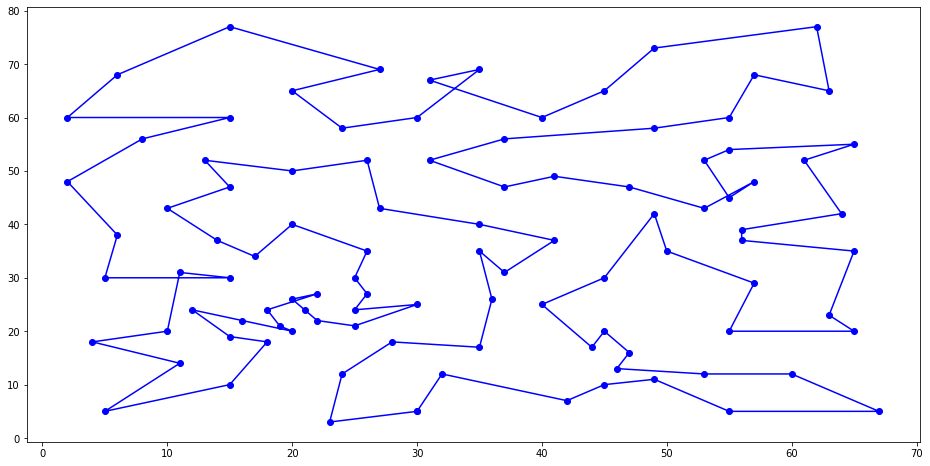

best 736.6261276721656


In [ ]:
import random
import math

# acceptance probability
def accept(current_cost, new_cost, T):
    if new_cost <= current_cost:
        return True 
    if random.random() < np.exp(-(new_cost-current_cost)/T) : 
        return True
    else: 
        return False
    
# cooling schedule
def updateTemperature(T, k):
    return  T*0.9995
    #return T/k

# Simulated Annealing algorithm    
def SA(prob, T_Max, T_Min):
    S = prob.init_solution()
    S_cost = prob.eval(S)
    
    #prob.displayTour(S)
    
    S_best = S
    S_best_cost = S_cost
    
    T = T_Max
    k=0
    while T > T_Min:
        k=k+1
        S_prim = prob.perturb_solution(S)
        S_prim_cost = prob.eval(S_prim)
        
        if accept(S_cost, S_prim_cost, T):
            S = S_prim.copy()
            S_cost = S_prim_cost
        if S_cost < S_best_cost:
            S_best = S.copy()
            S_best_cost = S_cost
            print(S_best_cost, T)
            
        T = updateTemperature(T,k)
    
    return S_best_cost, S

best, S = SA(prob, 1000., 0.000001)
prob.displayTour(S)
print("best", best)


###  Solving the knapsack problem using Simulated Annealing

1. Solution encoding:  binary vector
 * $S_i=1$ if object  $i$ is selected
 * $S_i=1$ if object  $i$ is not selected
2. Local perturbation:  change the value of a randomly selected component: $S_i=1-S_i$
3. Evaluation of a configuration:   a common variant is to include in the objection function the degree of constraints satisfaction (penalty function technique) – the value of a configuration which does not satisfy the constraint is penalized by a term which is proportional with the amount by which the constraint is violated (e.g. the weight which overpasses the knapsack capacity).


$V(S)=\sum_{i=1}^n v_iS_i$ if  $\sum_{i=1}^n w_iS_i\leq C$

$V(S)=\alpha\sum_{i=1}^n v_iS_i+(1-\alpha)(C-\sum_{i=1}^n w_iS_i)$  if  $\sum_{i=1}^n w_iS_i> C$


**Notations:** $v_i$ denotes the value of object $i$, $w_i$ denotes the weight of object $i$ and $C$ it the knapsack capacity, $\alpha\in (0,1)$ quantifies the relative importance of the total value and the constraint satisfaction.

**Application 2.**  Implement a Simulated Annealing algorithm for a knapsack problem. Test data can be found at http://people.sc.fsu.edu/~jburkardt/datasets/knapsack_01/knapsack_01.html



In [ ]:
class Knapsack:
    def __init__(self, capacity, objects_values, objects_weights):
        self.capacity = capacity
        self.objects_values = np.array(objects_values)
        self.objects_weights = np.array(objects_weights)
        self.N = len(objects_values)
        
    def eval(self, S, alpha=0.5):
        weight = np.sum(S * self.objects_weights)
        value = np.sum(S * self.objects_values)
        #print (weight, value, S)
        if weight <= self.capacity: # the selected objects fit into the knapsack
            return -value
        else:
            return  -(alpha*value + (1-alpha) * (self.capacity - weight)) 
    
    def init_solution(self):
        """ Solution initialization - each candidate solution is encoded as a binary array S 
            S[i]=0 if object i is not selected 
            S[i]=1 if object i is selected
        """
        return np.random.choice([0, 1], size=(self.N,))

    def perturb_solution(self, S):
        """ 
        A new candidate solution is constructed by complementing a randomly selected element 
        (a random object is either inserted or removed from the knapsack)
        """
        i = random.sample(range(self.N),1)
        new_S = S.copy()
        new_S[i] = 1 - S[i]
        return new_S

In [ ]:
#prob = Knapsack(165, [92,57,59,68,60,43,67,84,87,72], [23,31,29,44,53,38,63,85,89,82])
#optimal solution [1,1,1,1,0,1,0,0,0,0]
prob = Knapsack(20, [3,4,1,5,2], [10,8,3,6,5])
best, S = SA(prob, 1000., 0.000001)
#S=[1,1,1,1,0,1,0,0,0,0]
print("best", np.sum(S * prob.objects_values), S)

-7 997.5024987503127
-9 995.0112350131176
-11 994.5137293956111
best 9 [1 0 1 1 0]


## Tabu Search

### Description of the method

Tabu Search is a metaheuristic based on an iterated local search which relies on the usage of a list of already visited configurations which become “forbidden” (tabu) at least for a given number of iterations.

General structure of  Tabu Search:

>S=initial configuration
>
>Sbest=S
>
>TabuList=[]    // the tabu list is initially empty
>
>Iter=1
>
>Repeat
>
>>    S=perturb(S,TabuList)
>>
>>    If better(S,Sbest) then Sbest=S endif
>>
>>    iter=iter+1
>>
>Until iter<=iterMax

The perturbation of the current configuration is based on the identification (in its neighborhood) of a better configuration which is not in the tabu list. Once a configuration is chosen it is inserted in the tabu list. The tabu list is implemented as a circular queue (when the maximal size of the list is reached the first element in the list is removed). 
 

>Perturb(S,TabuList)
>
>Sbest=S
>
>For each element  S’ from the neighborhood N(S)
>>
>>   If  better(S’,Sbest) and (S’ is not in TabuList) then
>>>
>>>       Sbest=S’
>>>
>>   Endif
>
>Endfor
>
>S=Sbest
>
> update the TabuList by adding S
>
>Return S, TabuList

The function better(S’,Sbest)  checks if configuration $S’$ is better than configuration Sbest. Unlike Simulated Annealing which uses directly the value of the objective function to compute the acceptance probability, in Tabu Search it is enough to decide which of the configurations is better. This means that the constraints can be analyzed directly, without using the penalty method.





### Example:  Solving the knapsack problem using Tabu Search

1. Solution encoding:  binary vector
2. Local perturbation:  change the value (0->1,1->0) of a randomly selected component
3. Tabu list structure: it contains candidate solutions (binary vectors)
4. Comparison between two candidate solutions: 
 * If both S and S’ are feasible then the configuration having a higher value is better. 
 * If only one of the solutions is feasible then it is better than the other one (a feasible solution is always better than an unfeasible one). 
 * If none of the solutions is feasible then that which violates less the constraint is better 


In [ ]:
# Remark: other implementations: https://www.techconductor.com/algorithms/python/Search/Tabu_Search.php


def ElementInTabuList(el, TabuList):
    '''
    :param el current element (to be searched in the TabuList)
    :param TabuList - list with "forbidden" elements

    :return True if el is in TabuList and False otherwise
    '''
    dim = list(range(len(el)))
    for a in TabuList:
        found = True
        for i in dim:
            if el[i] != a[i]:
                found = False
                break
        if found:
            return True;
    return False

def PerturbTabuSearch(prob, S, cost_S, TabuList, dimNeighborhood, TabuListMaxSize):
    '''
    :param prob - problem to be solved
    :param S - current candidate solution
    :param cost_S - cost of S
    :param TabuList - list  with "forbidden" elements
    :param dimNeighborhood - size of the neighborhood
    :param TabuListMaxSize - maximal size of the TabuList

    :return new candidate solution and update TabuList
    '''    
    C = prob.perturb_solution(S) # element din vecinătatea lui S
    cost_C = prob.eval(C)
    # genereaza candidați și îl selectează pe cel mai bun care nu e in tabuList
    for i in range(dimNeighborhood-1):
        el = prob.perturb_solution(S)
        cost_el = prob.eval(el) # generează un nou candidat
        if (not ElementInTabuList(el,TabuList)) and cost_el < cost_C: 
            C = el.copy()
            cost_C = cost_el

    if cost_C < cost_S:
        S = C.copy()
        cost_S = cost_C
        if len(TabuList) > TabuListMaxSize:
            TabuList.pop(0)
        TabuList.append(S)

    return S, cost_S, TabuList

def TabuSearch(prob, max_iter=1000, dimNeighborhood = 20, TabuListMaxSize=10):
    S = prob.init_solution()
    cost_S = prob.eval(S)
    Best=S.copy()
    cost_Best = cost_S
    TabuList=[] 
    TabuList.append(S.copy()) 
    it=1
    while it < max_iter:
        S, cost_S, TabuList = PerturbTabuSearch(prob, S, cost_S, TabuList, dimNeighborhood, TabuListMaxSize)
        if cost_S < cost_Best:
            Best = S.copy(); 
            cost_Best = cost_S
        it=it+1
    print (TabuList)
    return Best, cost_Best

prob = Knapsack(20, [3,4,1,5,2], [10,8,3,6,5])
S, best = TabuSearch(prob,dimNeighborhood=prob.N)
print(best,S)
print(prob.objects_values)
#prob.displayTour(S)
print("best", np.sum(S * prob.objects_values))

[array([1, 0, 0, 1, 0]), array([1, 0, 1, 1, 0])]
-9 [1 0 1 1 0]
[3 4 1 5 2]
best 9


## Continuous optimization problems: zero order (without derivatives) methods

### Pattern Search
Main idea:  search by constructing 2n candidate solutions from the current one (by sequentially adding a positive and a negative adaptive step on each of the n coordinates).  Details: lecture 2

### Nelder Mead
Main idea:  use a set of (n+1) points (simplex) to search the function landscape and update the vertices of the simplex by using some geometric transformations (extension, contraction, shrinking) in such a way that the quality of the vertices is improved. Details: lecture 2 


**Exercises:**

1. Compare the behavior of Pattern Search and Nelder Mead for the 2D Sphere, 2D Rosenbrock and 2D Ackley functions (using the same computational budget, i.e. number of function evaluations)
2. Analyze the influence of the control parameters: (i) initial value of $r$ in the case of Pattern Search and $r$, $e$, $c$ and $s$ in the case of Nelder Mead
3. Modify the test functions and the Pattern_Search function such that it can be applied for functions with an arbitrary number of components (hint: exclude the operations used for the graphical illustration)
 

In [3]:
# Test functions: Sphere, Rosenbrock, Ackley
# 2-dimensional case

def Sphere(v):
    x = v[0]
    y = v[1]
    return x**2 + y**2

def Rosenbrock(v):
    x = v[0]
    y = v[1]
    return (1.0 - x)**2 + 100.0*(y - x**2)**2
    
def Ackley(v):
    x=v[0]
    y=v[1]
    term1 = -20 * np.exp(-0.2 * ((1/2.) * (x**2 + y**2)**(0.5)))
    term2 = np.exp((1/2.)*(np.cos(2*np.pi*x) + np.cos(2*np.pi*y)))
    return term1 - term2 + 20 + np.exp(1)

In [ ]:
def Graphical_illustration(func, iter_x, iter_y, x_start=-2, x_stop=2, y_start=-2, y_stop=2):
    x = np.linspace(x_start,x_stop,250)
    y = np.linspace(y_start,y_stop,250)
    X, Y = np.meshgrid(x, y)
    Z = func([X, Y])

    #Angles needed for quiver plot
    anglesx = iter_x[1:] - iter_x[:-1]
    anglesy = iter_y[1:] - iter_y[:-1]

    %matplotlib inline
    import matplotlib.pyplot as plt
    #plt.style.use('seaborn-white')
    from mpl_toolkits import mplot3d

    fig = plt.figure(figsize = (16,8))

    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
    ax.plot(iter_x,iter_y, func([iter_x,iter_y]),color = 'r', marker = '*', alpha = .4)

    ax.view_init(45, 280)
    ax.set_xlabel('x')
    ax.set_ylabel('y')


    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X,Y,Z, 50, cmap = 'jet')
    #Plotting the iterations and intermediate values
    ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
    ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
    ax.set_title('Pattern Search {} iterations'.format(len(iter_count)))

    plt.show()

In [1]:
# Pattern Search implementation - 2D case

%matplotlib inline
import random, numpy, math, copy, matplotlib.pyplot as plt
import numpy as np
def Pattern_Search(f ,x, y, r=0.8, nMax = 50):
    '''
    param f = function to be minimized
    param x, y = components corresponding to the initial approximation
    param r = length of the search step
    param nMax = maximal number of iterations
    '''
    #Initialization
    i = 0
    iter_x, iter_y, iter_count = np.empty(0), np.empty(0), np.empty(0)
    S = np.array([x,y])
    E = np.array([0,0])   # search direction - to be updated at each step
    best = S              # best value found so far
    val_best = f(S)       # objective function corresponding to the best value
    points =[]            # points belonging to the search trajectory
    # Iterating as long as the number of iterations is smaller than a maximal value
    while i < nMax:
        i +=1
        S_prim = S        # current position
        for j in range(len(E)):  # generation of the search directions (1,0), (-1,0), (0,1), (0,-1)
            E[j-1] = 0
            E[j] = 1
            # print("E=",E)
            val_S_prim = f(S_prim)
            S_plus = S + r*E
            if f(S_plus)< val_S_prim:
               S_prim = S_plus
            S_minus = S - r*E
            if f(S_minus)< val_S_prim:
               S_prim = S_minus 
        if np.array_equal(S, S_prim ):
            r = r/2
        else:
            S = S_prim
            
        if f(S) < val_best:
            best = S
            val_best = f(S)
            x,y = S[0], S[1]
            
            iter_x = np.append(iter_x,x)
            iter_y = np.append(iter_y,y)
            iter_count = np.append(iter_count ,i)   
        
         
    return best, iter_x,iter_y, iter_count


best,iter_x,iter_y, iter_count = Pattern_Search(Ackley,-0.5, 1)
print("best", best)
Graphical_illustration(Ackley, iter_x, iter_y,  x_start=-2, x_stop=2, y_start=-2, y_stop=2)

NameError: ignored

In [ ]:
# Nelder Mead implementation

class Element:
    def __init__(self, el, cost):
        self.el = el
        self.cost = cost
    def __repr__(self):
        return "[{self.el}, {self.cost}]".format(self=self)
    
def NelderMead(func, x_start,  start = -5, stop = 5, max_iter = 10, r=1, e=2, c =0.5, s=0.5):
    """
    :param func = function to be optimized
    :param x_start = initial configuration
    :param start = lower bound of the function domain
    :param stop = upper bound of the function domain
    :param max-iter = maximal number of iterations
    :r, e, c, s = parameters used for reflection, expension, contraction, shrinking
    """
    n = len(x_start) 
    best = Element(np.array(x_start), func(x_start))
    
    points =[]
    modification="initial simplex"
    
    # selection of the initial vertices of the simplex - (n+1) random points
    l = [best]   # first vertex is the best element
    for i in range(n):
        el = np.random.uniform(low=start, high=stop, size=(n,))
        l.append(Element(el, func(el)))
    print(l)
    it = 0
    while it < max_iter:
        it += 1      
        # increasing sorting by cost (first vertex is the best one, the last vertex is the worst one)
        l = sorted(l, key=lambda x: x.cost) 
        if it%2==0:    # collect the points to be used for visualization (current simplex and the type of last transformation)
            points.append([[x.el for x in l], modification])
        
        # Average of the first n vertices
        M = np.zeros(n)
        for i in range(n): 
            M += l[i].el
        M /= n
        # Sequence of transformations
        # Reflection
        xr = M + r * (M - l[n].el)
        cost_xr = func(xr)
        if l[0].cost <= cost_xr < l[n-1].cost:
                l.pop()  # remove the worst element
                l.append(Element(xr, cost_xr))  # add the new element
                modification = "reflection"
                continue
        
        # Expansion
        if cost_xr < l[0].cost:
                xe = M + e * (xr - M)
                cost_xe = func(xe)
                if cost_xe < cost_xr:
                    l.pop()   # remove the worst element
                    l.append(Element(xe, cost_xe)) # add the element obtained be expansion
                    modification = "expansion"
                    continue
                else:
                    l.pop()  # remove the worst element
                    l.append(Element(xr, cost_xr)) # add the element obtained be reflection
                    modification = "expansion"
                    continue
                    
        #  Contraction (Exterior/ Interior)
      
        if l[n-1].cost <= cost_xr < l[n].cost:
                xc = M + c * (xr - M)
                cost_xc = func(xc)
                if cost_xc < cost_xr:
                    l.pop()  # remove the worst element
                    l.append(Element(xc, cost_xc))  # add the element obtained be contraction
                    modification = "contraction (exterior)"
                    continue
        elif cost_xr >= l[n].cost:
                xcc = M + c * (l[n].el - M)
                cost_xcc = func(xcc)
                if cost_xcc < l[n].cost:
                    l.pop()
                    l.append(Element(xcc, cost_xcc))
                    modification = "contraction (interior)"
                    continue
                
        # Shrinking
        new_l = [l[0]]  # keep the best vertex and move the other vertices toward it
        for i in range(1,n+1):
            v = l[0].el + s * (l[i].el - l[0].el)
            new_l.append(Element(v, func(v)))
        l = new_l
        modification = "shrinking"
    return l[0], points

sol, points = NelderMead(Ackley, [-2,2], -5,5)
print("Sol=", sol)

[[[-2  2], 4.927233671124704], [[3.8800762  0.53192808], 8.31707981176461], [[-1.46000701  4.5056488 ], 9.889703779472647]]
Sol= [[-0.08020091 -0.09866371], 0.6434315991462332]


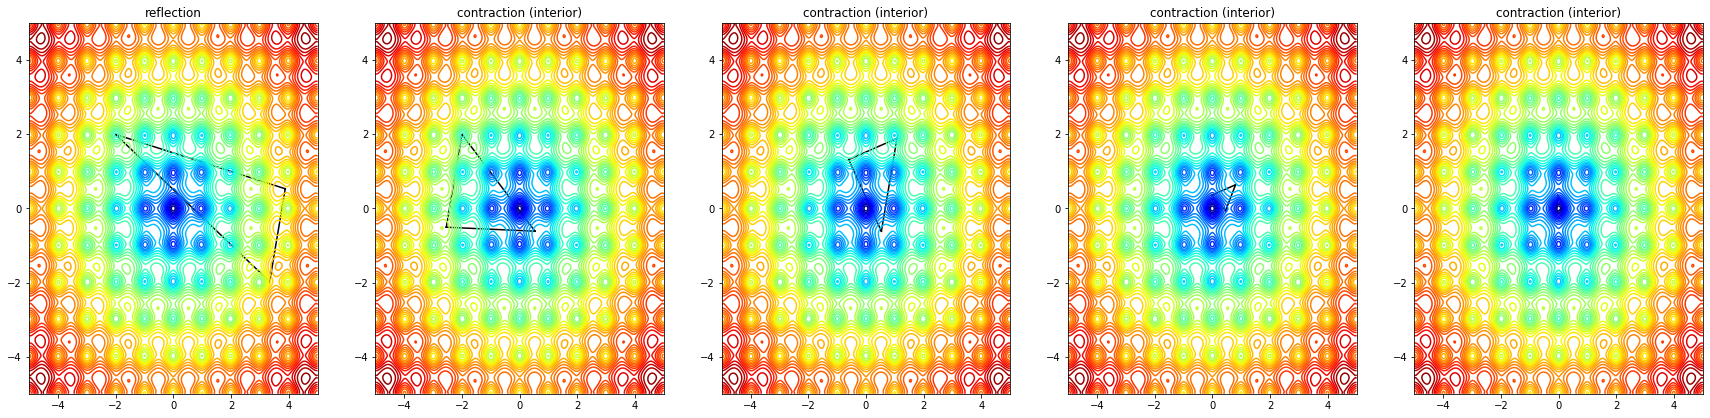

In [ ]:
def FunctionPlot(func, points, start=-2, stop=2):
    x = np.linspace(start,stop,2500)
    y = np.linspace(start,stop,2500)
    X, Y = np.meshgrid(x, y)
    Z = func([X, Y])

    %matplotlib inline
    import matplotlib.pyplot as plt
    #plt.style.use('seaborn-white')
    from mpl_toolkits import mplot3d

    fig = plt.figure(figsize = (30,15))

    grid_y = 5
    grid_x = len(points) // grid_y + 1

    k=0
    for t in points:
            #Contour plot
            ax = fig.add_subplot(grid_x, grid_y, k+1)
            ax.contour(X,Y,Z, 50, cmap = 'jet')
            #Plotting the iterations and intermediate values
            plt.triplot([el[0] for el in t[0]],[el[1] for el in t[0]], color="black")
            ax.set_title(t[1])
            k += 1           
    #ax.set_title('Function (surface and contour plot)'.format(len(iter_count)))

    plt.show()
    
FunctionPlot(Ackley, points, start=-5, stop=5)  # Rmk!: it might take some time to generate the plot